# Data ingestion & inspection


## 1. NumPy and pandas working together
Pandas depends upon and interoperates with NumPy, the Python library for fast numeric array computations. For example, you can use the DataFrame attribute .values to represent a DataFrame df as a NumPy array. You can also pass pandas data structures to NumPy methods. In this exercise, we have imported pandas as pd and loaded world population data every 10 years since 1960 into the DataFrame df. This dataset was derived from the one used in the previous exercise.

Your job is to extract the values and store them in an array using the attribute .values. You'll then use those values as input into the NumPy np.log10() method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy np.log10() method and compare the results.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("datasets/world_population.csv")

In [4]:
df.head()

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
Year                6 non-null int64
Total Population    6 non-null float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [6]:
# Import numpy
import numpy as np

# Create array of DataFrame values: np_vals
np_vals = df.values
np_vals

array([[1.96000000e+03, 3.03497056e+09],
       [1.97000000e+03, 3.68482270e+09],
       [1.98000000e+03, 4.43659036e+09],
       [1.99000000e+03, 5.28271599e+09],
       [2.00000000e+03, 6.11597449e+09],
       [2.01000000e+03, 6.92428294e+09]])

In [7]:
# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)
np_vals_log10

array([[3.29225607, 9.48215448],
       [3.29446623, 9.5664166 ],
       [3.29666519, 9.64704933],
       [3.29885308, 9.72285726],
       [3.30103   , 9.78646566],
       [3.30319606, 9.84037481]])

In [8]:
# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)
df_log10

,Year,Total Population
0,3.292256,9.482154
1,3.294466,9.566417
2,3.296665,9.647049
3,3.298853,9.722857
4,3.301030,9.786466
5,3.303196,9.840375


In [9]:
# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

Wonderful work! As a data scientist, you'll frequently interact with NumPy arrays, pandas Series, and pandas DataFrames, and you'll leverage a variety of NumPy and pandas methods to perform your desired computations. Understanding how NumPy and pandas work together will prove to be very useful.

## 2. Zip lists to build a DataFrame
In this exercise, you're going to make a pandas DataFrame of the top three countries to win gold medals since 1896 by first building a dictionary. list_keys contains the column names 'Country' and 'Total'. list_values contains the full names of each country and the number of gold medals awarded. The values have been taken from Wikipedia.

Your job is to use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the list(), zip(), dict() and pd.DataFrame() functions. Pandas has already been imported as pd.

Note: The zip() function in Python 3 and above returns a special zip object, which is essentially a generator. To convert this zip object into a list, you'll need to use list(). 

In [10]:
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]
list_keys = ['Country', 'Total']

In [11]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using
zipped

[('Country', ['United States', 'Soviet Union', 'United Kingdom']),
 ('Total', [1118, 473, 273])]

In [12]:
# Build a dictionary with the zipped list: data
data = dict(zipped)
data

{'Country': ['United States', 'Soviet Union', 'United Kingdom'],
 'Total': [1118, 473, 273]}

In [13]:
# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
df

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


Fantastic! Being able to build DataFrames from scratch is an important skill.

## 3. Labeling your data
You can use the DataFrame attribute df.columns to view and assign new string labels to columns in a pandas DataFrame.

Import a DataFrame df containing top Billboard hits from the 1980s (from Wikipedia). Each row has the year, artist, song name and the number of weeks at the top. However, this DataFrame has the column labels a, b, c, d. Your job is to use the df.columns attribute to re-assign descriptive column labels.

In [15]:
list_values = [[1980, 1981, 1982], 
               ["Blondie", "Christopher Cross", "Joan Jett"], 
               ["Call Me", "Arthurs Theme", "I Love Rock and Roll"],
               [6, 3, 7]]
list_keys = ["a", "b", "c", "d"]

In [17]:
df = pd.DataFrame(dict(zip(list_keys, list_values)))
df

,a,b,c,d
0,1980,Blondie,Call Me,6
1,1981,Christopher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


In [18]:
# Build a list of labels: list_labels
list_labels = ["year", "artist", "song", "chart weeks"]

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels
df

,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Christopher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


Great work! You'll often need to rename column names like this to be more informative.

## 4. Building DataFrames with broadcasting
You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. In this exercise, you're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. We have imported the names of 15 cities as the list cities.

Your job is to construct a DataFrame from the list of cities and the string 'PA'.

In [21]:
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake','Mineral springs', 'Cassville','Hannastown','Saltsburg','Tunkhannock','Pittsburgh','Lemasters','Great bend']

In [22]:
# Make a string with the value 'PA': state
state = "PA"

# Construct a dictionary: data
data = {'state':state, 'city':cities}
data

{'state': 'PA',
 'city': ['Manheim',
  'Preston park',
  'Biglerville',
  'Indiana',
  'Curwensville',
  'Crown',
  'Harveys lake',
  'Mineral springs',
  'Cassville',
  'Hannastown',
  'Saltsburg',
  'Tunkhannock',
  'Pittsburgh',
  'Lemasters',
  'Great bend']}

In [23]:
# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
df

,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville
5,PA,Crown
6,PA,Harveys lake
7,PA,Mineral springs
8,PA,Cassville
9,PA,Hannastown


Excellent job! Broadcasting is a powerful technique.



## 5. Reading a flat file
Your job is to read the World Bank population data into a DataFrame using read_csv(). 

The next step is to reread the same file, but simultaneously rename the columns using the names keyword input parameter, set equal to a list of new column labels. You will also need to set header=0 to rename the column labels.

Finish up by inspecting the result with df.head() and df.info() (changing df to the name of your DataFrame variable).

In [25]:
data_file = "datasets/world_population.csv"

In [26]:
# Read in the file: df1
df1 = pd.read_csv(data_file)
df1

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


In [27]:
# Create a list of the new column labels: new_labels
new_labels = ["year", "population"]

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv(data_file, header=0, names=new_labels)
df2

,year,population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


Well done! Knowing how to read in flat files using pandas is a vital skill.

## 6. Delimiters, headers, and extensions
Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

In this exercise, you have monthly stock data for four companies downloaded from Yahoo Finance. The data is stored as one row for each company and each column is the end-of-month closing price.

In addition, this file has three aspects that may cause trouble for lesser tools: multiple header lines, comment records (rows) interleaved throughout the data rows, and space delimiters instead of commas.

Your job is to use pandas to read the data from this problematic file_messy using non-default input options with read_csv() so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file with the variable file_clean that has been prepared for you, as you might do in a real data workflow.

You can learn about the option input parameters needed by using help() on the pandas function pd.read_csv().

In [28]:
file_messy = "datasets/messy_stock_data.tsv"

In [ ]:
# Inside messy_stock_data.tsv

The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful, are they?
probably should just throw this line away too, but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
# So that line you just read has all the column headers labels
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96
MSFT 45.51 43.08 42.13 43.47 47.53 45.96 45.61 45.51 43.56 48.70 53.88 55.40
# That MSFT is MicroSoft
GOOGLE 512.42 537.99 559.72 540.50 535.24 532.92 590.09 636.84 617.93 663.59 735.39 755.35
APPLE 110.64 125.43 125.97 127.29 128.76 127.81 125.34 113.39 112.80 113.36 118.16 111.73
# Maybe we should have bought some Apple stock in 2008?

In [39]:
# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)
df1

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN
MSFT 45.51 43.08 42.13 43.47 47.53 45.96 45.61 45.51 43.56 48.70 53.88 55.40,NaN
# That MSFT is MicroSoft,NaN
GOOGLE 512.42 537.99 559.72 540.50 535.24 532.92 590.09 636.84 617.93 663.59 735.39 755.35,NaN
APPLE 110.64 125.43 125.97 127.29 128.76 127.81 125.34 113.39 112.80 113.36 118.16 111.73,NaN
# Maybe we should have bought some Apple stock in 2008?,NaN


In [54]:
# Read in the file with the correct parameters: df2
# Comment attribute Indicates remainder of line should not be parsed. If found at the beginning
# of a line, the line will be ignored altogether. 

df2 = pd.read_csv(file_messy, delimiter=" ", header=3, comment="#", index_col="name")
df2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
name,,,,,,,,,,,,
IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


Superb! It's important to be able to save your cleaned DataFrames in the desired file format!

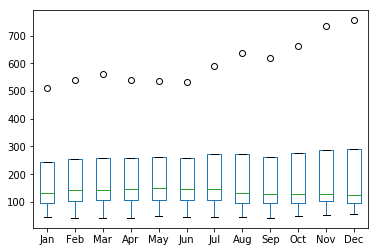

In [62]:
import matplotlib.pyplot as plt
df2.plot(kind="box");

## 7. Plotting series using pandas
Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. You will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. We have pre-loaded a pandas DataFrame df which contains the data you need. Your job is to use the DataFrame method df.plot() to visualize the data, and then explore the optional matplotlib input parameters that this .plot() method accepts.

The pandas .plot() method makes calls to matplotlib to construct the plots. This means that you can use the skills you've learned in previous visualization courses to customize the plot. In this exercise, you'll add a custom title and axis labels to the figure.

Before plotting, inspect the DataFrame in the IPython Shell using df.head(). Also, use type(df) and note that it is a single column DataFrame.

In [115]:
temp = pd.read_csv("datasets/weather_data_austin_2010.csv", index_col = "Date", parse_dates = True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


In [116]:
temp[temp.index < "2010-04-01"].tail()

,Temperature,DewPoint,Pressure
Date,,,
2010-03-31 19:00:00,68.0,52.0,1.0
2010-03-31 20:00:00,65.3,52.3,1.0
2010-03-31 21:00:00,63.3,52.2,1.0
2010-03-31 22:00:00,61.9,52.3,1.0
2010-03-31 23:00:00,60.9,52.4,1.0


In [117]:
temp_to_april = temp[temp.index < "2010-04-01"]

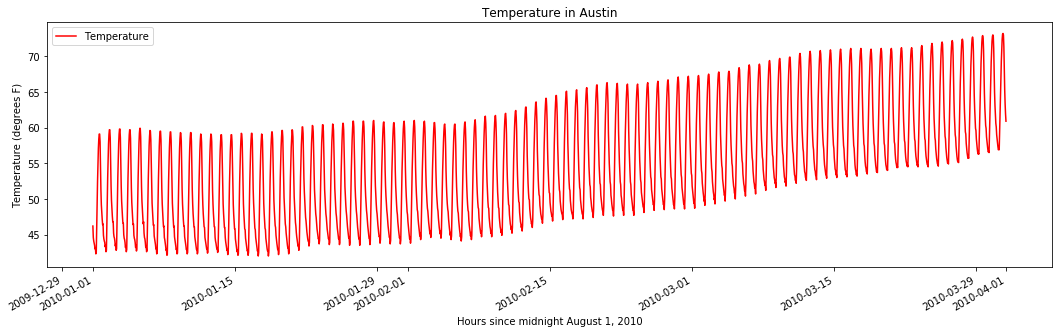

In [118]:
# Create a plot with color='red'
temp_to_april.plot(y = "Temperature", color = "red", figsize=(18, 5))

# Add a title
plt.title("Temperature in Austin")

# Specify the x-axis label
plt.xlabel("Hours since midnight August 1, 2010")

# Specify the y-axis label
plt.ylabel("Temperature (degrees F)")

# Display the plot
plt.show()

## 8. Plotting DataFrames
Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling df.plot() will cause pandas to over-plot all column data, with each column as a single line. In this exercise, load the three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Your job is to plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, use a list of column names passed into the DataFrame df[column_list] to limit plotting to just one column, and then just 2 columns of data. When you are finished, you will have created 4 plots. You can cycle through them by clicking on the 'Previous Plot' and 'Next Plot' buttons.

As in the previous exercise, inspect the DataFrame df in the IPython Shell using the .head() and .info() methods.

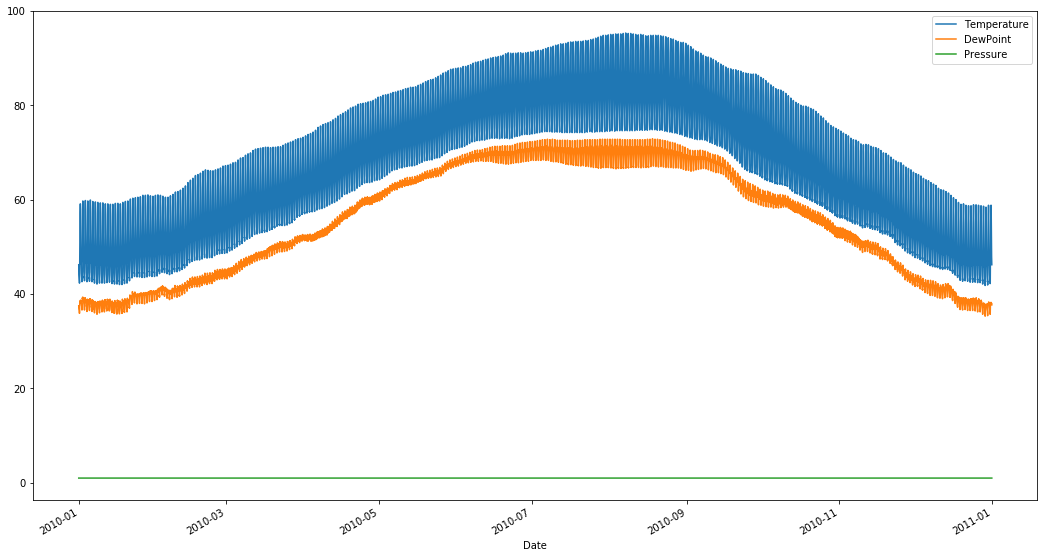

In [142]:
# Plot all columns (default)
temp.plot(figsize=(18, 10))
plt.show()

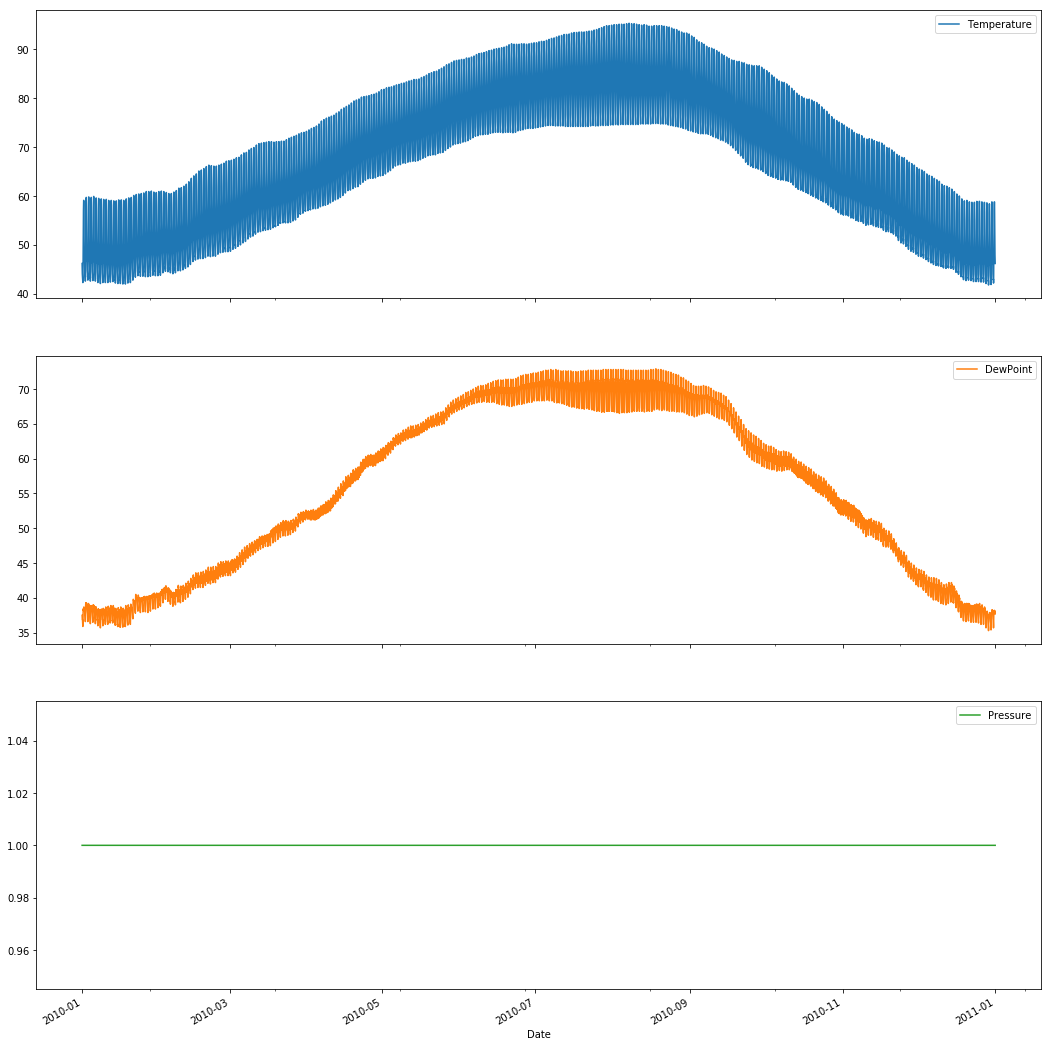

In [135]:
# Plot all columns as subplots
temp.plot(subplots=True,figsize=(18, 20))
plt.show()

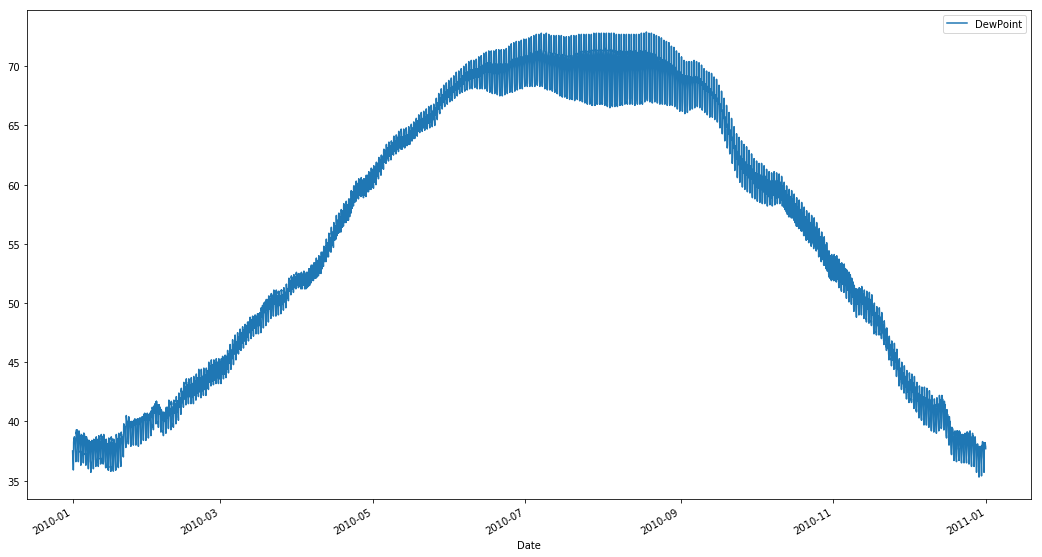

In [137]:
# Plot just the Dew Point data
column_list1 = ['DewPoint']
temp[column_list1].plot(figsize=(18, 10))
plt.show()

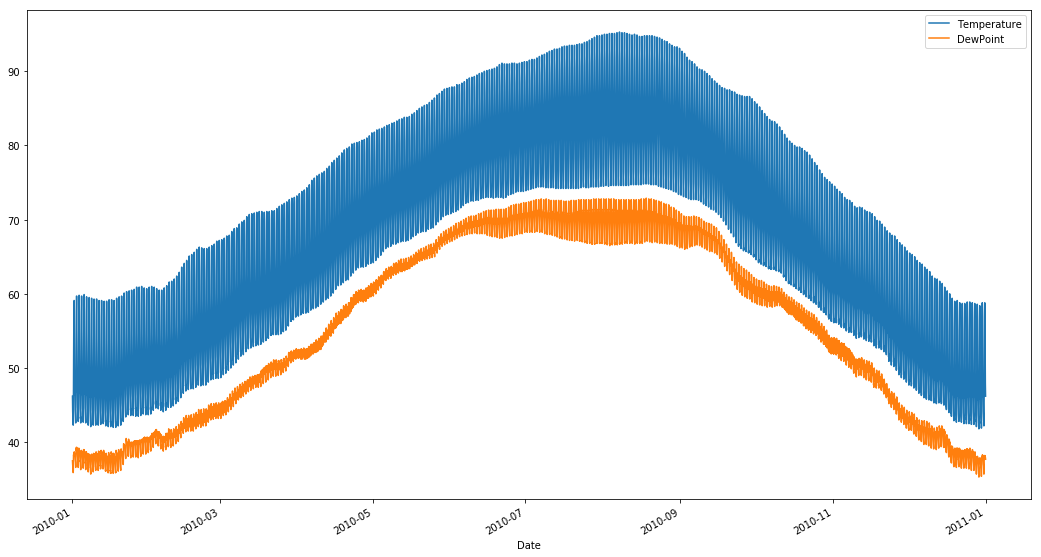

In [138]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
temp[column_list2].plot(figsize=(18, 10))
plt.show()

Great work!